# SURPRISE HOUSING ASSIGNMENT

#### Problem Statement:

**PROBLEM STATEMENT**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house. 

Also, we need to determine the optimal value of lambda for ridge and lasso regression.

# Importing necessary Libraries

In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Loading the data and understand the variables

In [2]:
# Read the given CSV file

df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# checking shape of the dataframe
df.shape

(1460, 81)

In [4]:
# checking the distribution for continuous variables
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#Checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- Some of the categorical variables are integer type 

# Data Cleaning Activities

In [6]:
df.nunique().sort_values(ascending=False).head()

Id           1460
LotArea      1073
GrLivArea     861
BsmtUnfSF     780
1stFlrSF      753
dtype: int64

In [7]:
#As Id column is the index which is a unique identifier.It will not impact our analysis , so drop it.
df = df.drop(['Id'],axis='columns')

# Checking for missing Values

In [8]:
# Checking the missing values
round(df.isnull().sum()/len(df.index),2).sort_values(ascending=False)

PoolQC         1.00
MiscFeature    0.96
Alley          0.94
Fence          0.81
FireplaceQu    0.47
               ... 
ExterCond      0.00
ExterQual      0.00
Exterior2nd    0.00
Exterior1st    0.00
SalePrice      0.00
Length: 80, dtype: float64

In [9]:
# Considering 40% of missing values as my threshold and dropping the column having more then the threshold
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/
                                                                 len(df.index),2).values>0.40].sort_values(ascending=False).head(5)


PoolQC         1.00
MiscFeature    0.96
Alley          0.94
Fence          0.81
FireplaceQu    0.47
dtype: float64

In [10]:
# dropping the columns having more then 0.40 threshold as it will not impact our analysis
df = df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns')

In [11]:
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [12]:
# Drop duplicate values if any

df.drop_duplicates()
print(df.shape)

(1460, 75)


##### Observation
- No duplicates data present

In [14]:
#Checking the shape of the dataset again
df.shape

(1460, 75)

In [15]:
# Check MSSubClass column(The categorical column as integer type)
df.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [16]:
#MSSubClass is a unordered categorical variable but the datatype is integer type so we have to convert it into object type
#Create an MSSubClass dict and replace the values in the column.

MSSubClass_dict = {
    20 : '1-STORY_NEWER',
    30 : '1-STORY_OLDER',
    40 : '1-STORY_FINISHED',
    45 : '1-1/2-STORY_UNFINISHED',
    50 : '1-1/2-STORY_FINISHED',
    60 : '2-STORY_NEWER',
    70 : '2-STORY_OLDER',
    75 : '2-1/2-STORY',
    80 : 'SPLIT_OR_MULTI-LEVEL',
    85 : 'SPLIT_FOYER',
    90 : 'DUPLEX',
     120: '1-STORY_PUD',
     150: '1-1/2-STORY_PUD'  ,
     160: '2-STORY_PUD' ,
     180: 'PUD_MULTILEVEL'  ,
     190  : '2-FAMILY'  
}
df = df.replace({"MSSubClass": MSSubClass_dict })

In [17]:
#OverallQual is a ordered categorical variable but the datatype is integer so convert it ino object type 
OverallQual_dict = {
    10 : 'VE',
    9 : 'E',
    8 : 'VG',
    7 : 'G',
    6 : 'AA',
    5 : 'A',
    4 : 'BA',
    3 : 'F',
    2 : 'P',
    1 : 'VP',
}
df = df.replace({"OverallQual": OverallQual_dict })

In [18]:
#OverallCond is a ordered categorical variable but the datatype is integer so convert it ino object type 
OverallCond_dict = {
    10 : 'VE',
    9 : 'E',
    8 : 'VG',
    7 : 'G',
    6 : 'AA',
    5 : 'A',
    4 : 'BA',
    3 : 'F',
    2 : 'P',
    1 : 'VP',
}
df = df.replace({"OverallCond": OverallCond_dict })

In [19]:
# checking datatypes of the variables and null values again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   object 
 16  OverallCond    1460 non-null   object 
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

- Some of the categorical columns are converted into object type.

# Missing value imputation

In [20]:
# check for null values in all categorical columns

df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [21]:
# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
# Hence, we will first impute the categorical variables with 'None'
# for the "below categorical columns" we will impute the null values with 'None'
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual','MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
            'BsmtFinType1','BsmtFinType2','Electrical'):
    
     df[col] = df[col].fillna('None')


In [22]:
# check for null values in all numerical columns
df.select_dtypes(exclude='object').isnull().sum()[df.select_dtypes(exclude='object').isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [23]:
# for the "below numerical columns" we will impute the null values with 'median'
for col in ('MasVnrArea','LotFrontage','GarageYrBlt'):
    
    df[col] = df[col].fillna(df[col].median())

In [24]:
# checking for the presence of any more null values
df.isnull().values.any()

False

In [25]:
# Selecting categorical columns
col=df.select_dtypes(include='object').columns
print(col)

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [26]:
#Dropping of categorical variables which have more value counts as it will not impact more to our analysis.

def ValueCounts():
    column = []
    columns = df.select_dtypes(include=['object'])
    for col in (columns):
        if(df[col].value_counts().max() >= 1200):
            column.append(col)
    return column

removedColumn = ValueCounts()

print(removedColumn)

df.drop(removedColumn, axis = 1, inplace = True)

df.head()
df.shape

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType']


(1460, 56)

In [27]:
# Selecting numerical columns
co=df.select_dtypes(exclude='object').columns
print(co)

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [28]:
#Dropping of numerical variables which have more value counts as it will not impact more to our analysis.
def ValueCounts():
    column = []
    columns = df.select_dtypes(exclude=['object'])
    for col in (columns):
        if(df[col].value_counts().max() >= 1200):
            column.append(col)
    return column

removedColumn = ValueCounts()

print(removedColumn)

df.drop(removedColumn, axis = 1, inplace = True)


df.shape

['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


(1460, 47)

### Outlier Treatment

In [29]:
# checking the distribution for continuous variables
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,1971.267808,1984.865753,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,...,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,6.321918,2007.815753,180921.195890
std,22.027677,9981.264932,30.202904,20.645407,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,...,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,...,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,...,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
90%,92.000000,14381.700000,2006.000000,2006.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,...,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,10.000000,2010.000000,278000.000000
95%,104.000000,17401.150000,2007.000000,2007.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,...,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,11.000000,2010.000000,326100.000000
99%,137.410000,37567.640000,2009.000000,2009.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,1418.920000,...,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,12.000000,2010.000000,442567.010000


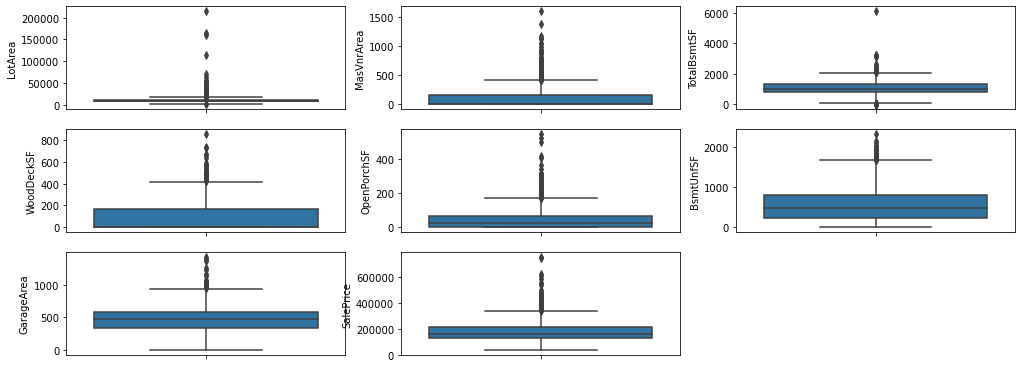

In [30]:
# Check the outliers by plotting boxplot for some  numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(9,3,1)
sns.boxplot(y = 'LotArea', data = df)
plt.subplot(9,3,2)
sns.boxplot(y = 'MasVnrArea' , data = df)
plt.subplot(9,3,3)
sns.boxplot(y = 'TotalBsmtSF', data = df)
plt.subplot(9,3,4)
sns.boxplot(y = 'WoodDeckSF', data = df)
plt.subplot(9,3,5)
sns.boxplot(y = 'OpenPorchSF', data = df)
plt.subplot(9,3,6)
sns.boxplot(y = 'BsmtUnfSF', data = df)
plt.subplot(9,3,7)
sns.boxplot(y = 'GarageArea', data = df)
plt.subplot(9,3,8)
sns.boxplot(y = 'SalePrice', data = df)

plt.show()

From the above box plot some variables contain outliers.

In [31]:
#IQR to handle outliers
# Selecting numerical columns
cols=df.select_dtypes(exclude='object').columns
#print(co)

Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.95)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [32]:
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,...,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,69.366551,9732.187456,1971.353310,1984.785366,99.575610,431.380488,568.887805,1045.855749,1151.663415,340.326132,...,6.489895,0.598606,1978.640418,1.762369,470.887108,91.917770,45.113589,6.318467,2007.816725,178588.045993
std,19.872768,4154.438952,30.148839,20.671096,168.928927,426.475459,442.576069,410.434217,367.053977,427.275907,...,1.589848,0.633115,23.989253,0.744092,211.142495,121.349445,61.709246,2.698915,1.331623,74649.649069
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,60.000000,7500.000000,1954.000000,1966.500000,0.000000,0.000000,224.000000,794.000000,879.500000,0.000000,...,5.000000,0.000000,1962.000000,1.000000,326.500000,0.000000,0.000000,5.000000,2007.000000,129500.000000
50%,69.000000,9400.000000,1973.000000,1993.000000,0.000000,378.000000,481.000000,988.000000,1080.000000,0.000000,...,6.000000,1.000000,1980.000000,2.000000,478.000000,0.000000,24.000000,6.000000,2008.000000,161750.000000
75%,79.000000,11450.000000,2001.000000,2004.000000,162.500000,701.000000,808.000000,1276.500000,1376.000000,728.000000,...,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,66.000000,8.000000,2009.000000,211500.000000
90%,92.000000,14113.800000,2006.000000,2006.000000,320.000000,1040.000000,1233.200000,1588.000000,1661.000000,931.200000,...,8.000000,1.000000,2006.000000,3.000000,750.000000,256.000000,129.600000,10.000000,2010.000000,275000.000000
95%,102.000000,16473.800000,2007.000000,2007.000000,442.000000,1247.600000,1468.600000,1734.000000,1800.000000,1121.300000,...,9.000000,2.000000,2007.000000,3.000000,843.300000,324.300000,170.000000,11.000000,2010.000000,324300.000000
99%,130.000000,24891.880000,2009.000000,2009.000000,763.960000,1532.520000,1798.300000,2109.660000,2157.320000,1354.280000,...,11.000000,2.000000,2009.000000,3.000000,990.920000,482.600000,264.320000,12.000000,2010.000000,428640.000000


# Exploratory data analysis

In [33]:
# Selecting categorical columns
cat_var = df.select_dtypes(include='object').columns
print(cat_var)

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')


In [34]:
# lets define a function to plot SalePrice across numerical variables
def plot_cat(cat_var):
    plt.figure(figsize=(10, 5))
    sns.barplot(x= cat_var ,y="SalePrice",data= df,palette="rocket", linewidth=5)
    plt.xticks(rotation=90)
    plt.show()

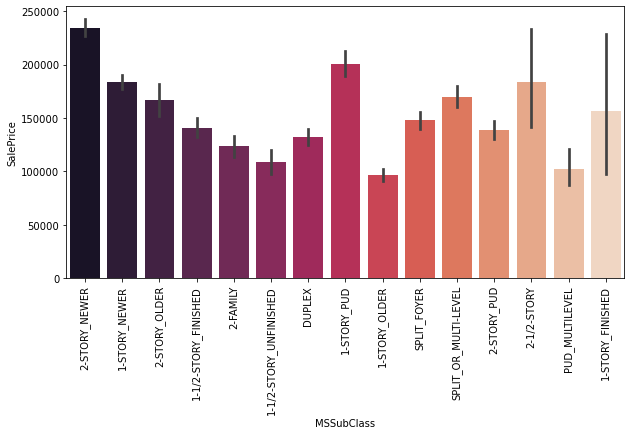

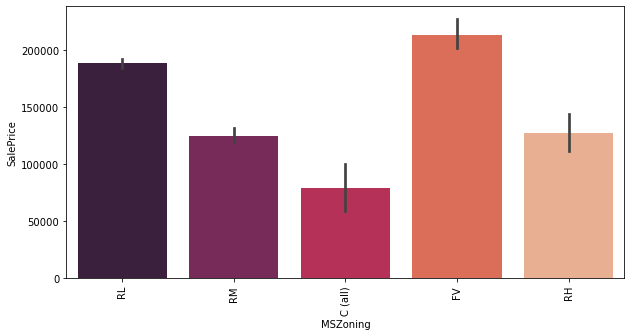

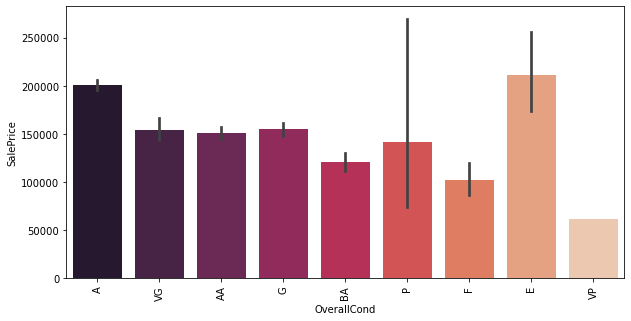

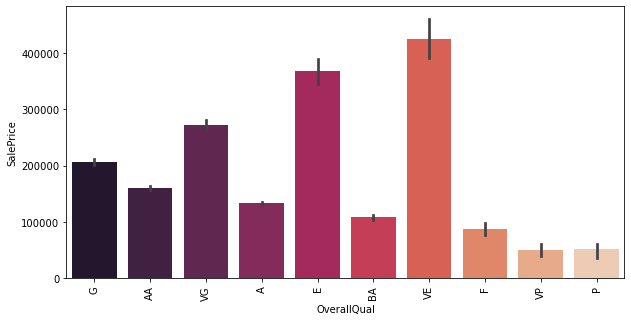

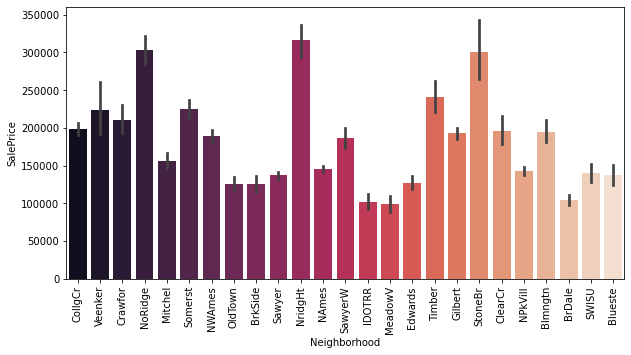

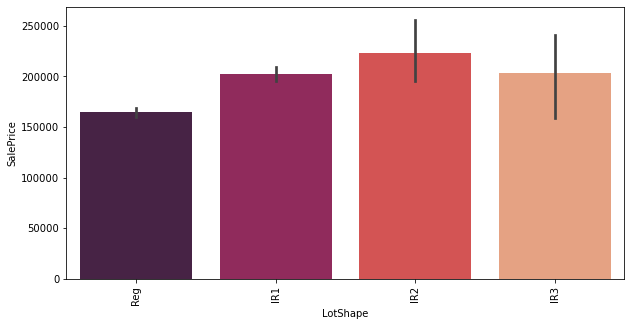

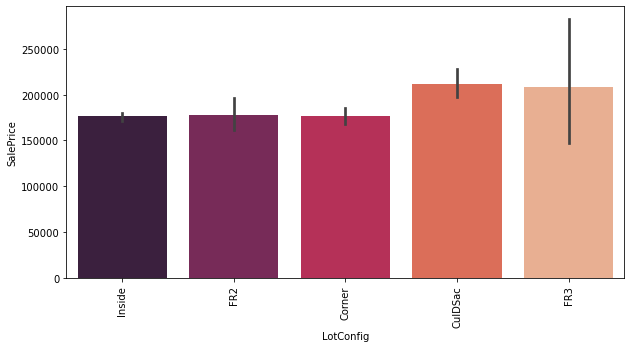

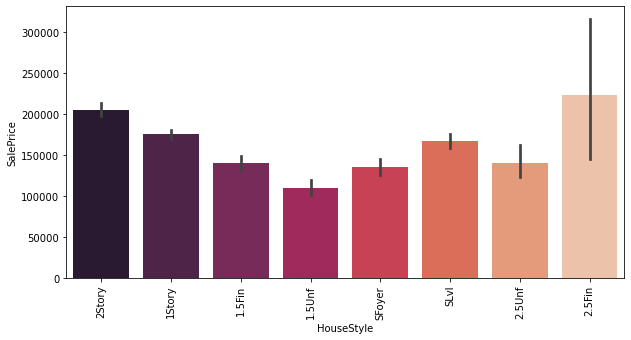

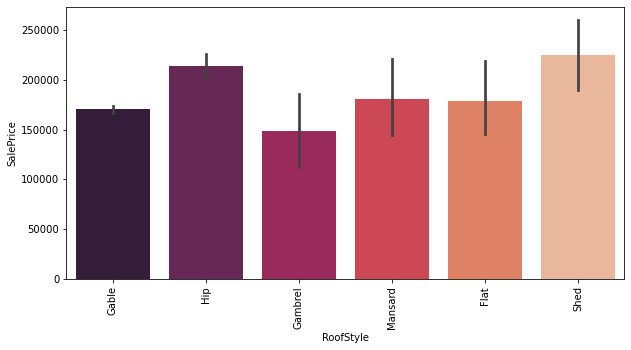

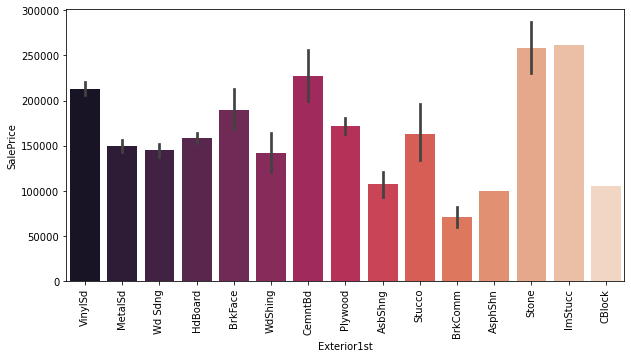

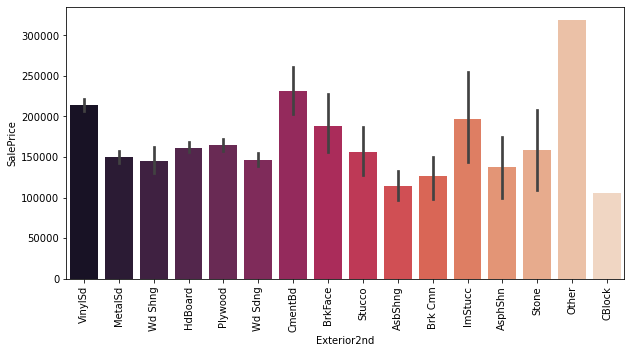

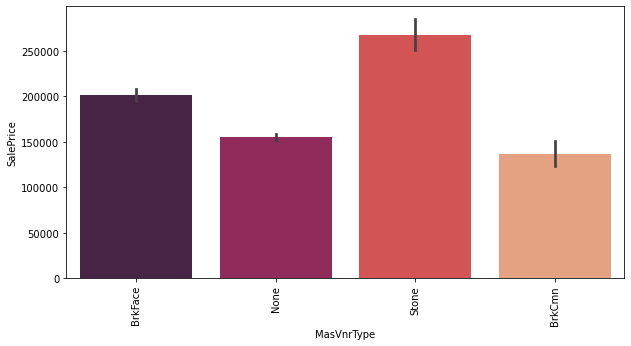

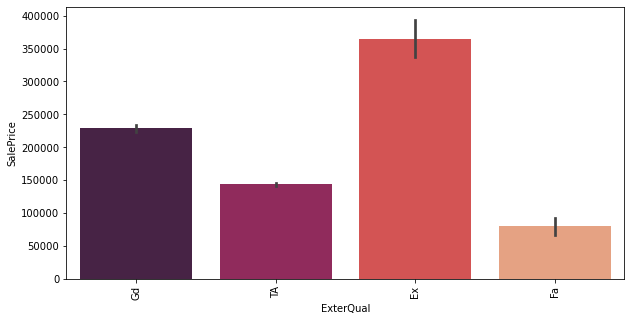

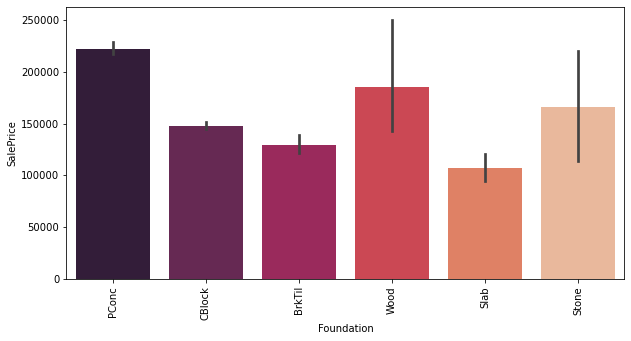

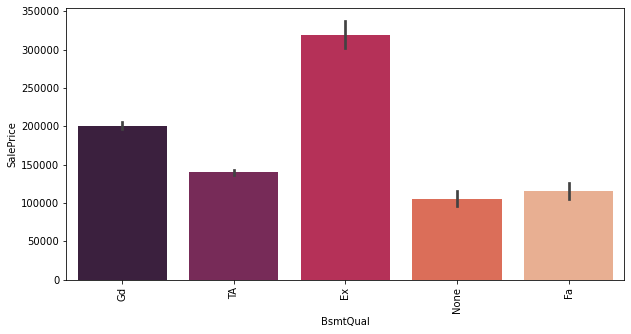

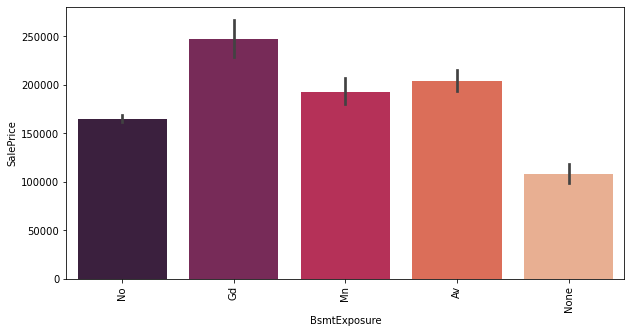

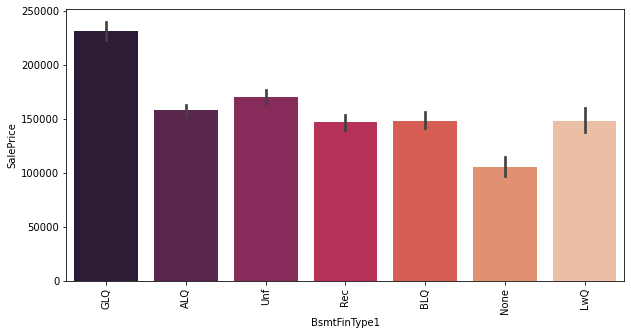

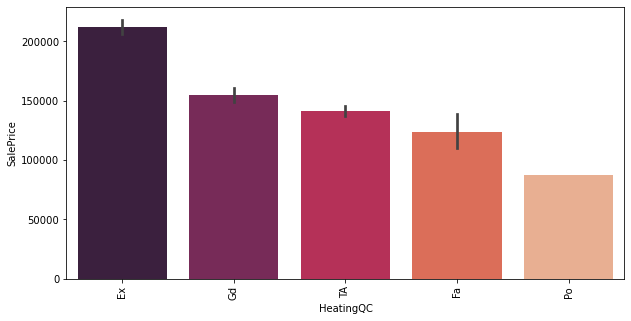

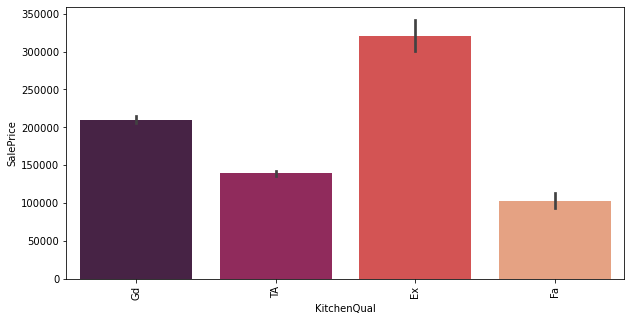

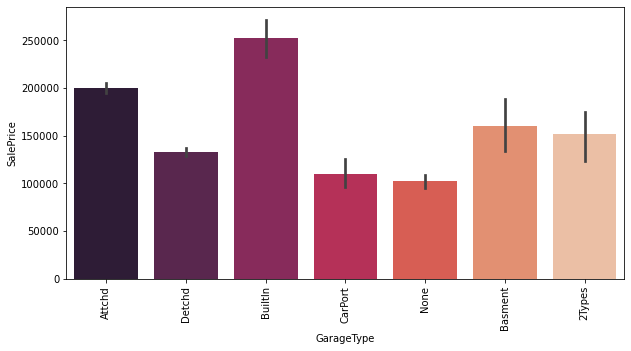

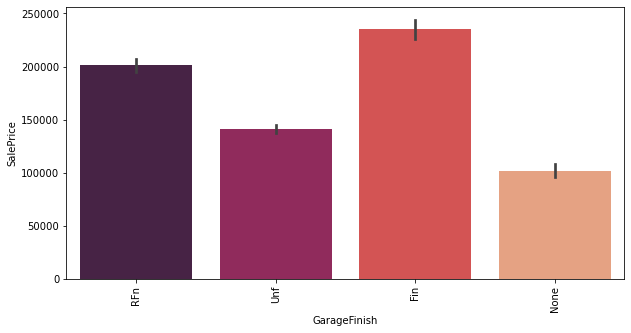

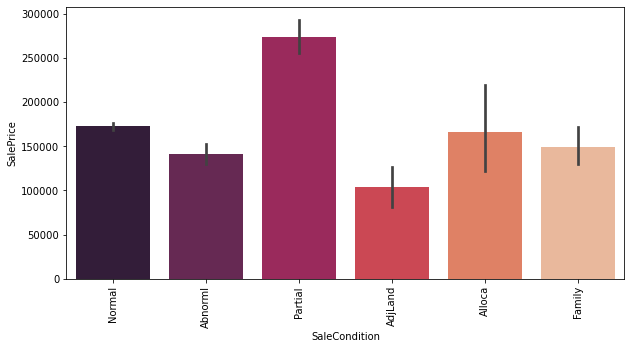

In [35]:
# Compare SalePrice across different categorical variables
plot_cat('MSSubClass')
plot_cat("MSZoning")
plot_cat("OverallCond")
plot_cat("OverallQual")
plot_cat('Neighborhood')
plot_cat('LotShape')
plot_cat('LotConfig')
plot_cat('HouseStyle')
plot_cat('RoofStyle')
plot_cat('Exterior1st')
plot_cat('Exterior2nd')
plot_cat('MasVnrType')
plot_cat('ExterQual')
plot_cat('Foundation')
plot_cat('BsmtQual')
plot_cat('BsmtExposure')
plot_cat('BsmtFinType1')
plot_cat('HeatingQC')
plot_cat('KitchenQual')
plot_cat('GarageType') 
plot_cat('GarageFinish')   
plot_cat('SaleCondition')   


## Observations:
- 2-STORY_NEWER have high SalePrice.
- Residential Low Density,Floating Village Residential have high price
- If overallcondition of house is excellent and average then the saleprice is higher.
- Increase in the overall quality has a direct positive effect on the sale price
- Some of the Neighborhoods are high priced.
- For a Moderately Irregular LotShape SalePrice is high.
- SalePrice is high if Lot configuration is Frontage on 3 sides of property or Cul-de-sac
- For housestyle Two story and Two and one-half story: 2nd level finished saleprice is high
- If RoofStyle is Hip and Shed the SalePrice is high.
- If Exterior covering on house is Imitation Stucco and Stone type then higher the SalePrice.
- The Other category for Exterior covering on house (if more than one material) the SalePrice is high.
- If Masonry veneer type is made up of stone it contributes to higer SalePrice
- For Excellent external quality of house the saleprice is high.
- Foundation made up of Poured Contrete	leads to higher price.
- IF the height of the basement is Excellent (100+ inches) the SalePrice is high.	
- The SalePrice is high in case of good BsmtExposure 
- Good Living Quarters for BsmtFinType1 have higher SalePrice
- Increase in the Heating quality and condition has a direct positive effect on the sale price
- Increase in the KitchenQality has a direct positive effect on the sale price
- Garage part of house - typically has room above garage(Built-In) then SalePrice is high.
- If the Interior of the garage is finished then the SalePrice is high.
- If the Condition of sale is partial i.e Home was not completed when last assessed then SalePrice  is high.


In [36]:
# Selecting categorical columns
num_var = df.select_dtypes(exclude='object').columns
print(num_var)

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [37]:
# Some of the numerical variables
var =['LotFrontage', 'LotArea',  'GarageYrBlt', 'BsmtUnfSF', 'BsmtFinSF1','TotalBsmtSF', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF','SalePrice']

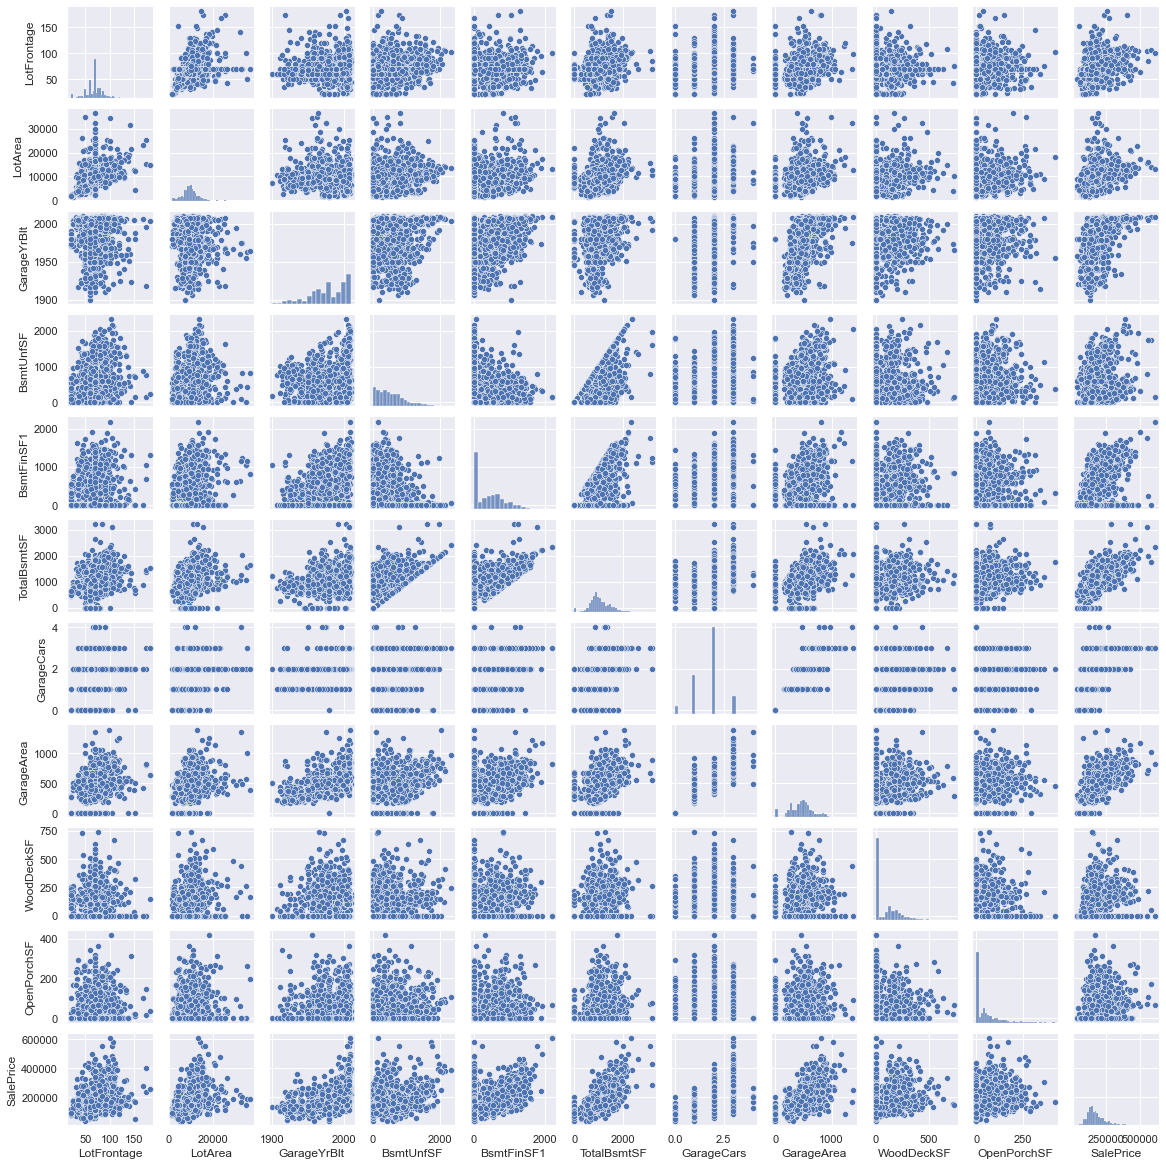

In [38]:
# Pair plot of some of the numerical variables with SalePrice
sns.set()
sns.pairplot(df[var], size = 1.5)
plt.show()

##### Observation
- The variables 'GarageCars','BsmtUnfSF','TotRmsAbvGrd','GarageYrBlt' are not contributing much to SalePrice

In [40]:
#### Drop some of the columns that are not contributing to 'SalePrice'
df = df.drop(['GarageCars','BsmtUnfSF','TotRmsAbvGrd','GarageYrBlt'],axis= 1)
df.shape

(1435, 43)

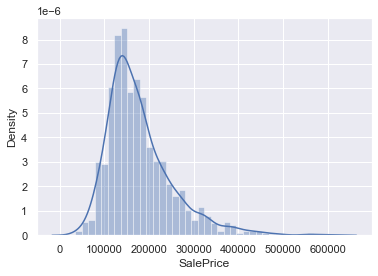

In [41]:
# Checking the Sale column distribution 
sns.set_style('darkgrid')
sns.distplot(df['SalePrice'],color='b')
plt.show()


#### Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

In [42]:
#Log Transformation
df['SalePrice']=np.log1p(df['SalePrice'])

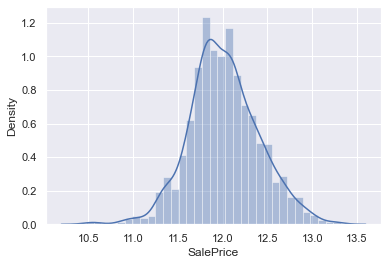

In [43]:
#Ploting the SalePrice again after log transformation
sns.set_style('darkgrid')
sns.distplot(df['SalePrice'])
plt.show()

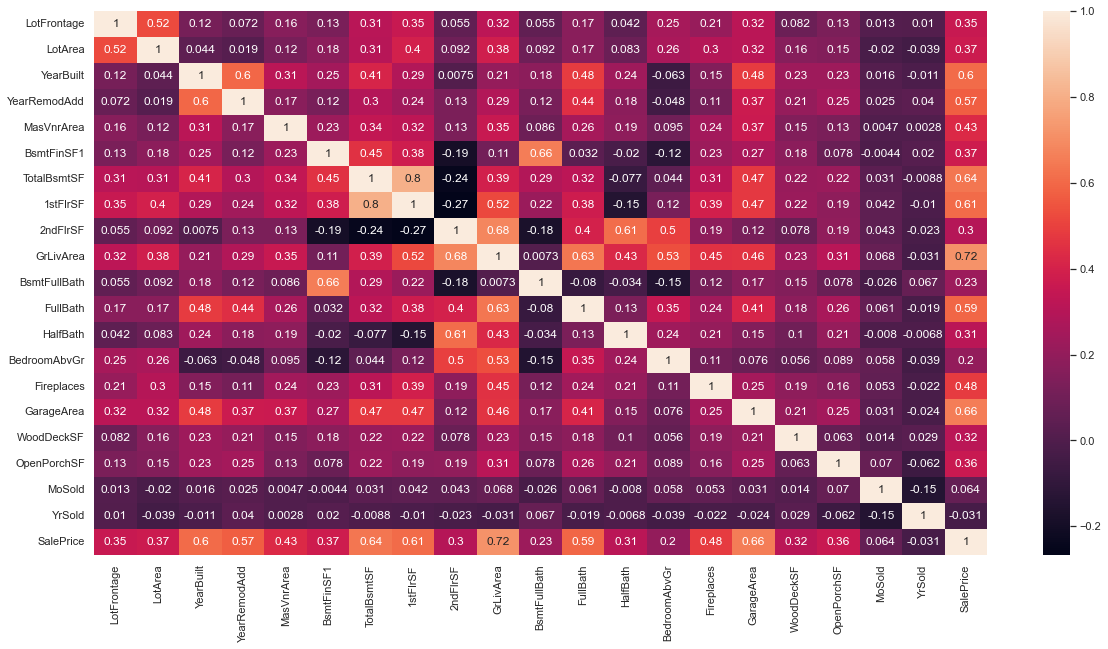

In [44]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

**Observation**
- Correlation among the variables seems to be good,not highly correlated. 

In [45]:
# Create a new column named houseAge and determine the age of the building at the time of selling

def houseAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['houseAge'] = df.apply(houseAge, axis=1)
df.head()  

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice,houseAge
0,2-STORY_NEWER,RL,65.0,8450,Reg,Inside,CollgCr,2Story,G,A,...,Attchd,RFn,548,0,61,2,2008,Normal,12.247699,5
1,1-STORY_NEWER,RL,80.0,9600,Reg,FR2,Veenker,1Story,AA,VG,...,Attchd,RFn,460,298,0,5,2007,Normal,12.109016,31
2,2-STORY_NEWER,RL,68.0,11250,IR1,Inside,CollgCr,2Story,G,A,...,Attchd,RFn,608,0,42,9,2008,Normal,12.317171,6
3,2-STORY_OLDER,RL,60.0,9550,IR1,Corner,Crawfor,2Story,G,A,...,Detchd,Unf,642,0,35,2,2006,Abnorml,11.849405,36
4,2-STORY_NEWER,RL,84.0,14260,IR1,FR2,NoRidge,2Story,VG,A,...,Attchd,RFn,836,192,84,12,2008,Normal,12.429220,8


In [46]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold , we can drop these columns as we 
# would only be using the derived column for further analysis
# As age of house is already been calculated 'MoSold' is not required

df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold','MoSold'], axis = 1, inplace = True)

In [47]:
#Checking the shape of the dataset again
df.shape

(1435, 40)

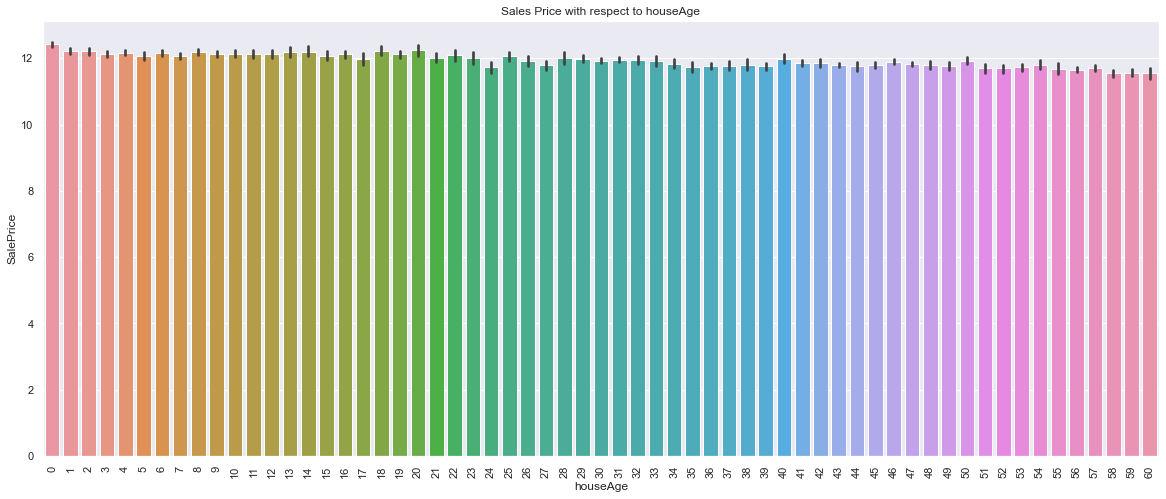

In [48]:
# plot 'houseAge' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x='houseAge', y="SalePrice", data= df)
plt.title("Sales Price with respect to houseAge")
plt.xticks(rotation=90)
plt.show()

#### Observation:
- With the increase in age of house the SalePrice decreases.

## Data Preparation

In [49]:
# Selecting categorical columns
num_var = df.select_dtypes(include='object').columns
print(num_var)

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')


In [50]:
##### Ordinal categorical variables
ord_cat = ['OverallQual','OverallCond','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual']

##### UnOrdinal categorical variables
unord_cat =['MSSubClass','MSZoning','LotShape','LotConfig','Neighborhood','HouseStyle','RoofStyle','Exterior1st','Exterior2nd',
            'MasVnrType','Foundation','GarageType','GarageFinish','SaleCondition']

In [51]:
df['overallQual'] = df['OverallQual'].map({'VE':10,'E':9,'VG':8,'G':7,'AA':6,'A':5,'BA':4,'F':3,'P':2,'VP':1 })
df['overallCond'] = df['OverallCond'].map({'VE':10,'E':9,'VG':8,'G':7,'AA':6,'A':5,'BA':4,'F':3,'P':2,'VP':1 })
df['lotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['exterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['bsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['bsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['bsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df['heatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['kitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

df['garageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

df['houseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })

df['lotConfig'] = df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df['masVnrType'] = df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df['saleCondition'] = df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,bsmtQual,bsmtExposure,bsmtFinType1,heatingQC,kitchenQual,garageFinish,houseStyle,lotConfig,masVnrType,saleCondition
0,2-STORY_NEWER,RL,65.0,8450,Reg,Inside,CollgCr,2Story,G,A,...,4,1,6,5,4,2,4,5,1,1
1,1-STORY_NEWER,RL,80.0,9600,Reg,FR2,Veenker,1Story,AA,VG,...,4,4,5,5,3,2,1,2,0,1
2,2-STORY_NEWER,RL,68.0,11250,IR1,Inside,CollgCr,2Story,G,A,...,4,2,6,5,4,2,4,5,1,1
3,2-STORY_OLDER,RL,60.0,9550,IR1,Corner,Crawfor,2Story,G,A,...,3,1,5,4,4,1,4,4,0,0
4,2-STORY_NEWER,RL,84.0,14260,IR1,FR2,NoRidge,2Story,VG,A,...,4,3,6,5,4,2,4,2,1,1


In [52]:
#Drop the original columns after mapping
df=df.drop(['OverallQual','OverallCond','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual'], axis=1)


In [53]:
#Select the unorder categorical colums from the dataset
unord_cat = df[unord_cat]
unord_cat.head(3)

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,GarageFinish,SaleCondition
0,2-STORY_NEWER,RL,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,RFn,Normal
1,1-STORY_NEWER,RL,Reg,FR2,Veenker,1Story,Gable,MetalSd,MetalSd,None,CBlock,Attchd,RFn,Normal
2,2-STORY_NEWER,RL,IR1,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,RFn,Normal


In [54]:
# convert into dummies
data_dummies = pd.get_dummies(unord_cat, drop_first=True)
data_dummies.head()

,MSSubClass_1-1/2-STORY_UNFINISHED,MSSubClass_1-STORY_FINISHED,MSSubClass_1-STORY_NEWER,MSSubClass_1-STORY_OLDER,MSSubClass_1-STORY_PUD,MSSubClass_2-1/2-STORY,MSSubClass_2-FAMILY,MSSubClass_2-STORY_NEWER,MSSubClass_2-STORY_OLDER,MSSubClass_2-STORY_PUD,...,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [55]:
# Droping the original unordered categorical columns
df = df.drop(list(unord_cat.columns), axis=1)

In [56]:
# Adding the dummy categorical column to original dataset
df = pd.concat([df,data_dummies], axis=1)

In [57]:
#checking the shape of the dataframe again
df.shape

(1435, 144)

In [58]:
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,...,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,856,856,854,1710,1,2,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,0.0,978,1262,1262,0,1262,0,2,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,162.0,486,920,920,866,1786,1,2,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,0.0,216,756,961,756,1717,1,1,...,1,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,1145,1145,1053,2198,1,2,...,0,0,0,1,0,0,0,0,1,0


In [59]:
# Checking the datatypes of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1459
Columns: 144 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(29), uint8(112)
memory usage: 559.2 KB


Now all columns are numeric 

# Splitting the Data into Training and Testing Sets

In [60]:
# split into train and test
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [61]:
print(df_train.shape)
print(df_test.shape)

(1004, 144)
(431, 144)


In [62]:
#columns to be scaled
cols=df.select_dtypes(include=['int64','float64']).columns
print(cols)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice', 'houseAge', 'overallQual', 'overallCond',
       'lotShape', 'exterQual', 'bsmtQual', 'bsmtExposure', 'bsmtFinType1',
       'heatingQC', 'kitchenQual', 'garageFinish', 'houseStyle', 'lotConfig',
       'masVnrType', 'saleCondition'],
      dtype='object')


In [63]:
#Scaling using MinMaxScaler
scaler = MinMaxScaler()
df_train[cols] = scaler.fit_transform(df_train[cols])
df_test[cols]=scaler.fit_transform(df_test[cols])

In [64]:
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,...,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
427,0.347826,0.207187,0.000000,0.131627,0.282907,0.197996,0.000000,0.175015,0.0,0.333333,...,1,0,0,0,1,0,0,0,1,0
1446,0.298137,0.705739,0.193846,0.271024,0.370555,0.295093,0.000000,0.260843,0.0,0.333333,...,0,0,0,0,1,0,0,0,1,0
391,0.310559,0.309915,0.000000,0.315356,0.250780,0.162405,0.636414,0.496946,0.5,0.666667,...,0,0,0,0,0,0,0,0,1,0
768,0.304348,0.221591,0.000000,0.010969,0.580162,0.519005,0.000000,0.458766,0.0,0.666667,...,0,0,0,0,0,0,0,0,1,0
991,0.621118,0.465085,0.000000,0.098720,0.285714,0.201106,0.454345,0.430055,0.0,0.333333,...,0,0,0,0,1,0,0,0,1,0


In [65]:
#Splitting X_train and y_train
y_train = df_train.pop('SalePrice')
X_train = df_train
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,...,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
427,0.347826,0.207187,0.000000,0.131627,0.282907,0.197996,0.000000,0.175015,0.0,0.333333,...,1,0,0,0,1,0,0,0,1,0
1446,0.298137,0.705739,0.193846,0.271024,0.370555,0.295093,0.000000,0.260843,0.0,0.333333,...,0,0,0,0,1,0,0,0,1,0
391,0.310559,0.309915,0.000000,0.315356,0.250780,0.162405,0.636414,0.496946,0.5,0.666667,...,0,0,0,0,0,0,0,0,1,0
768,0.304348,0.221591,0.000000,0.010969,0.580162,0.519005,0.000000,0.458766,0.0,0.666667,...,0,0,0,0,0,0,0,0,1,0
991,0.621118,0.465085,0.000000,0.098720,0.285714,0.201106,0.454345,0.430055,0.0,0.333333,...,0,0,0,0,1,0,0,0,1,0


In [66]:
X_train.shape

(1004, 143)

In [67]:
y_test = df_test.pop('SalePrice')
X_test = df_test
X_test.shape

(431, 143)

#  Model Building 
##### Model 1:

In [68]:
#Building of linear regression model with all features
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [69]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

95585429631.47914
[ 2.57955671e-02  5.08041833e-02  1.34960719e-02  5.18282221e-02
  1.19111952e-01 -2.65849889e-01 -1.54689775e-01  5.34670098e-01
  1.58160691e-02  3.06516991e-02  2.24011055e-02 -2.84247520e-03
  1.70396653e-02  7.92384491e-02  2.82063926e-02  2.37772995e-02
 -1.03378378e-02  1.55209329e-01  1.18745684e-01 -3.40675355e+10
  8.37489950e-04  2.59918284e-02  2.14191600e-02  3.22636009e-03
  1.23055922e-02  3.05428810e-02 -8.76919929e+10  2.33384395e+10
  1.33526036e+10 -1.86432467e+09 -4.79442389e+10 -1.93627061e-02
 -3.26827205e-02  8.60129842e-03 -3.10853781e-02 -1.88023578e-03
 -3.76437791e-02 -2.83172448e-02  3.50827117e-02  2.75357249e-02
 -6.68251090e-04  1.65907734e-03 -2.25912678e-02  5.31529332e-03
 -9.93277809e-03  1.35252599e-01  8.36651434e-02  1.14060875e-01
  1.02257199e-01 -1.13558452e+10 -2.27116903e+10  1.13558452e+10
  3.33815090e+09  6.67630180e+09  1.00144527e+10 -3.33815090e+09
 -2.16173068e-03 -2.03424900e-02 -5.49626623e-03 -1.36232085e-02
 -9.694

In [70]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train:",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss_train:",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss_test:",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train:",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test:",mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_train: 0.9335987634371754
r2_test: 0.8273276812435675
rss_train: 1.2317651935511866
rss_test: 1.589386115766878
mse_train: 0.0012268577625011818
mse_test: 0.0036876708022433365


**Observation**
- Clearly the model is overfitting the training score is high(93%),where as the test score is low(83%)


Let's now try predicting SalePrices,the LinearRegression function from SciKit Learn for its compatibility with RFE
#### Model 2:

In [71]:
# Running RFE with the output number of the variable equal to 60
lm = LinearRegression()
lm.fit(X_train, y_train)

np.random.seed(0)
rfe = RFE(lm, n_features_to_select=60)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [72]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 7),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 46),
 ('BsmtFinSF1', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 31),
 ('FullBath', False, 2),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', False, 78),
 ('Fireplaces', False, 6),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 8),
 ('OpenPorchSF', False, 14),
 ('houseAge', False, 47),
 ('overallQual', True, 1),
 ('overallCond', True, 1),
 ('lotShape', True, 1),
 ('exterQual', False, 83),
 ('bsmtQual', False, 34),
 ('bsmtExposure', True, 1),
 ('bsmtFinType1', False, 61),
 ('heatingQC', False, 43),
 ('kitchenQual', True, 1),
 ('garageFinish', True, 1),
 ('houseStyle', True, 1),
 ('lotConfig', True, 1),
 ('masVnrType', True, 1),
 ('saleCondition', True, 1),
 ('MSSubClass_1-1/2-STORY_UNFINISHED', False, 15),
 ('MSSubClass_1-STORY_FINISHED', True, 1),
 ('MSSubClass_1-STORY_NEWER', False, 52),
 ('MSSubClass_1-STORY_OLDER', True, 1

In [73]:
col = X_train.columns[rfe.support_]
col
# Extract the top features

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'overallQual', 'overallCond', 'lotShape',
       'bsmtExposure', 'kitchenQual', 'garageFinish', 'houseStyle',
       'lotConfig', 'masVnrType', 'saleCondition',
       'MSSubClass_1-STORY_FINISHED', 'MSSubClass_1-STORY_OLDER',
       'MSSubClass_2-1/2-STORY', 'MSSubClass_2-FAMILY',
       'MSSubClass_2-STORY_NEWER', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Shed',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_Stucco', 'Exterior2nd_

In [74]:
X_train.columns[~rfe.support_]
# Extract the non-important features

Index(['LotFrontage', 'MasVnrArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'houseAge',
       'exterQual', 'bsmtQual', 'bsmtFinType1', 'heatingQC',
       'MSSubClass_1-1/2-STORY_UNFINISHED', 'MSSubClass_1-STORY_NEWER',
       'MSSubClass_1-STORY_PUD', 'MSSubClass_2-STORY_OLDER',
       'MSSubClass_2-STORY_PUD', 'MSSubClass_DUPLEX',
       'MSSubClass_PUD_MULTILEVEL', 'MSSubClass_SPLIT_FOYER',
       'MSSubClass_SPLIT_OR_MULTI-LEVEL', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
    

In [75]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [76]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [77]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [78]:
#Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     211.3
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:11:13   Log-Likelihood:                 1849.1
No. Observations:                1004   AIC:                            -3592.
Df Residuals:                     951   BIC:                            -3332.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0177      0.009     -1.988      0.047      -0.035      -0.000
LotArea                         0.0450      0.015      3.048      0.002       0.016       0.074
BsmtFinSF1                      0.0695      0.008      8.862      0.000       0.054       0.085
TotalBsmtSF                     0.1458      0.019      7.731      0.000       0.109       0.183
1stFlrSF                       -0.2704      0.134     -2.024      0.043      -0.533      -0.008
2ndFlrSF                       -0.1380      0.081     -1.694      0.091      -0.298       0.022
GrLivArea                       0.5646      0.150      3.774      0.000       0.271       0.858
GarageArea                      0.0872      0.014      6.398      0.000       0.060       0.114
overallQual                     0.2061      0.015     13.509      0.000       0.176       0.236
overallCond                     0.1258      0.010     12.121      0.000       0.105       0.146
lotShape                       -0.0075      0.007     -1.114      0.266      -0.021       0.006
bsmtExposure                    0.0256      0.006      4.176      0.000       0.014       0.038
kitchenQual                     0.0460      0.009      5.408      0.000       0.029       0.063
garageFinish                    0.0055      0.006      0.981      0.327      -0.005       0.016
houseStyle                      0.0065      0.011      0.594      0.553      -0.015       0.028
lotConfig                      -0.0136      0.011     -1.272      0.204      -0.035       0.007
masVnrType                     -0.0054      0.005     -1.105      0.270      -0.015       0.004
saleCondition                   0.0267      0.003      7.766      0.000       0.020       0.033
MSSubClass_1-STORY_FINISHED    -0.0480      0.024     -1.989      0.047      -0.095      -0.001
MSSubClass_1-STORY_OLDER       -0.0352      0.007     -5.214      0.000      -0.048      -0.022
MSSubClass_2-1/2-STORY         -0.0510      0.032     -1.590      0.112      -0.114       0.012
MSSubClass_2-FAMILY            -0.0365      0.012     -3.099      0.002      -0.060      -0.013
MSSubClass_2-STORY_NEWER        0.0355      0.006      5.548      0.000       0.023       0.048
MSZoning_FV                     0.1460      0.020      7.171      0.000       0.106       0.186
MSZoning_RH                     0.0819      0.023      3.607      0.000       0.037       0.126
MSZoning_RL                     0.1174      0.019      6.107      0.000       0.080       0.155
MSZoning_RM                     0.0922      0.019      4.741      0.000       0.054       0.130
LotShape_IR2                    0.0020      0.009      0.219      0.826      -0.016       0.019
LotShape_IR3                   -0.0070      0.012     -0.587      0.558      -0.031       0.016
LotShape_Re

In the above model , according to the p-values , some of the variables are insignificant. 
Now we will take 30 features for RFE and will analyse the statics of the model.

#### Model 3:

In [79]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)

np.random.seed(0)
rfe = RFE(lm, n_features_to_select=30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [80]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'overallQual', 'overallCond', 'kitchenQual',
       'garageFinish', 'saleCondition', 'MSSubClass_1-STORY_OLDER',
       'MSSubClass_2-1/2-STORY', 'MSSubClass_2-FAMILY', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR3',
       'Neighborhood_Crawfor', 'HouseStyle_2.5Unf', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_Stucco', 'Exterior2nd_CBlock',
       'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Foundation_PConc',
       'SaleCondition_Partial'],
      dtype='object')

In [81]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [82]:
# Lets subset X_train and X_test for the RFE supported columns
X_train1 = X_train_rfe[X_train_rfe.columns]
X_test1 =  X_test[X_train_rfe.columns]

In [83]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [84]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [85]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     344.2
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:12:25   Log-Likelihood:                 1793.9
No. Observations:                1004   AIC:                            -3528.
Df Residuals:                     974   BIC:                            -3380.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0606      0.020     -3.035      0.002      -0.100      -0.021
LotArea                      0.0668      0.014      4.811      0.000       0.040       0.094
BsmtFinSF1                   0.0847      0.008     10.959      0.000       0.070       0.100
TotalBsmtSF                  0.1424      0.019      7.581      0.000       0.106       0.179
1stFlrSF                    -0.1277      0.128     -0.997      0.319      -0.379       0.124
2ndFlrSF                    -0.0669      0.080     -0.838      0.402      -0.224       0.090
GrLivArea                    0.4091      0.144      2.848      0.004       0.127       0.691
GarageArea                   0.1028      0.012      8.454      0.000       0.079       0.127
overallQual                  0.2316      0.015     15.276      0.000       0.202       0.261
overallCond                  0.1165      0.011     11.018      0.000       0.096       0.137
kitchenQual                  0.0529      0.009      6.056      0.000       0.036       0.070
garageFinish                 0.0378      0.006      6.332      0.000       0.026       0.050
saleCondition                0.0296      0.005      6.268      0.000       0.020       0.039
MSSubClass_1-STORY_OLDER    -0.0240      0.007     -3.635      0.000      -0.037      -0.011
MSSubClass_2-1/2-STORY      -0.0623      0.021     -2.936      0.003      -0.104      -0.021
MSSubClass_2-FAMILY         -0.0449      0.012     -3.784      0.000      -0.068      -0.022
MSZoning_FV                  0.1201      0.021      5.796      0.000       0.079       0.161
MSZoning_RH                  0.0642      0.023      2.757      0.006       0.018       0.110
MSZoning_RL                  0.1107      0.020      5.600      0.000       0.072       0.149
MSZoning_RM                  0.0742      0.020      3.719      0.000       0.035       0.113
LotConfig_FR3                0.0348      0.029      1.183      0.237      -0.023       0.092
Neighborhood_Crawfor         0.0411      0.008      5.372      0.000       0.026       0.056
HouseStyle_2.5Unf            0.0468      0.024      1.959      0.050   -7.59e-05       0.094
Exterior1st_BrkComm         -0.2009      0.042     -4.829      0.000      -0.283      -0.119
Exterior1st_CBlock          -0.0510      0.021     -2.454      0.014      -0.092      -0.010
Exterior1st_Stucco           0.0323      0.017      1.873      0.061      -0.002       0.066
Exterior2nd_CBlock          -0.0510      0.021     -2.454      0.014      -0.092      -0.010
Exterior2nd_Stone           -0.0276      0.020     -1.399      0.162      -0.066       0.011
Exterior2nd_Stucco          -0.0534      0.017     -3.144      0.002      -0.087      -0.020
Foundation_PConc             0.0287      0.004      7.834      0.000       0.022       0.036
SaleCondition_

#### Obsevation:
- By taking 30 features of RFE the adjusted R2 has not dropped much.(i.e from 91.6 to 90.8) 
- Again Some of the featues have high P-Value so we will go for 20 features for coarse tuning.

#### Model 4:

In [86]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

np.random.seed(0)
rfe = RFE(lm, n_features_to_select= 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [87]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'overallQual', 'overallCond', 'kitchenQual',
       'garageFinish', 'MSSubClass_2-1/2-STORY', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'HouseStyle_2.5Unf',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior2nd_CBlock'],
      dtype='object')

In [88]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [89]:
# Lets subset X_train and X_test for the RFE supported columns
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train_rfe.columns]

In [90]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1004, 20)
(1004,)
(431, 20)


# Ridge and Lasso Regression

Let's now try predicting SalePrices, a dataset used in simple linear regression, to perform ridge and lasso regression.

### Ridge Regression

##### Model 5

In [92]:

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [ 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 0.8}


In [95]:
#Fitting Ridge model for alpha = 0.8 and printing coefficients which have been penalised
alpha = 0.8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.05306223  0.07901807  0.15067091  0.0939777   0.08436444  0.14131998
  0.11081279  0.26087182  0.10194829  0.08359309  0.05376854 -0.03007529
  0.10329535  0.03886956  0.08500613  0.04202174  0.02080823 -0.13050982
 -0.02938641 -0.02938641]


In [97]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train:",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss_train:",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss_test:",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train:",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test:",mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train: 0.8908514723020546
r2_test: 0.8578221272738491
rss_train: 2.024741771465102
rss_test: 1.3086957915875923
mse_train: 0.0020166750711803805
mse_test: 0.0030364171498552025


In [98]:
# printing ridge optimised parameters and best mean test score
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 0.8}
-0.03380197601504204


In [99]:
# printing mean train and test scores along with rank
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results[['param_alpha', 'rank_test_score', 'mean_train_score', 'mean_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,rank_test_score,mean_train_score,mean_test_score
10,0.8,1,-0.032724,-0.033802
11,0.9,2,-0.032747,-0.033802
12,1.0,3,-0.032770,-0.033803
9,0.7,4,-0.032699,-0.033804
8,0.6,5,-0.032675,-0.033806
7,0.5,6,-0.032648,-0.033808
6,0.4,7,-0.032618,-0.033810
3,0.1,8,-0.032496,-0.033811
5,0.3,9,-0.032585,-0.033812
4,0.2,10,-0.032545,-0.033812


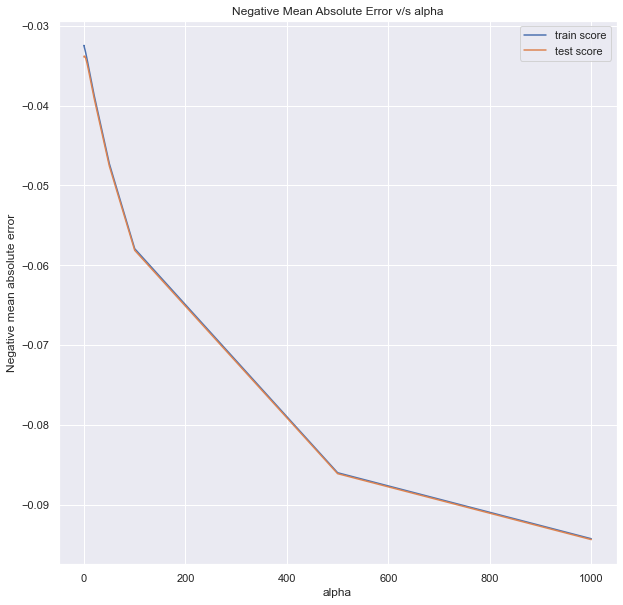

In [100]:
# Plotting test and train mean scores for different values of lambda/alpha
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('float64')
# plotting
plt.figure(figsize=(10,10))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.title("Negative Mean Absolute Error v/s alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [101]:
y_pred_test = ridge.predict(X_test)


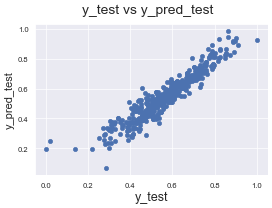

In [102]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=50)
plt.scatter(y_test ,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)  
plt.show()

In [103]:
res = y_test-y_pred_test

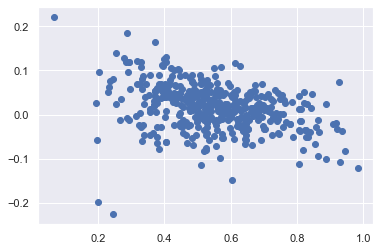

In [104]:
plt.scatter(y_pred_test,res)

plt.show()

Text(0.5, 0, 'Errors')

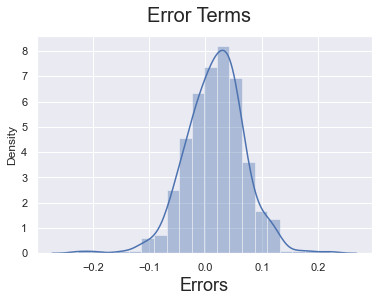

In [105]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

From the above figure the error terms are normally distributed.

### Lasso Regression

##### Model 6

In [106]:
lasso = Lasso()
params = {'alpha': [ 0.0001,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


The optimum value of alpha is 0.0001

In [109]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 0.0001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [3140]:
lasso.coef_

array([ 0.04711626,  0.07884764,  0.1490166 ,  0.        ,  0.02388602,
        0.24452302,  0.10919663,  0.28040107,  0.10171137,  0.07926319,
        0.05088318, -0.02024862,  0.06772874,  0.        ,  0.05135633,
        0.00727118,  0.00111412, -0.13419423, -0.        , -0.        ])

In [111]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train:",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss_train:",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss_test:",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train:",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test:",mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train: 0.8892895633937934
r2_test: 0.8352825534175945
rss_train: 2.053715705209145
rss_test: 1.5161644003399066
mse_train: 0.002045533570925443
mse_test: 0.0035177828314150966


In [112]:
y_pred_test = lasso.predict(X_test)

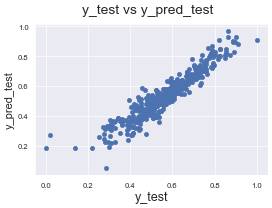

In [113]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=50)
plt.scatter(y_test ,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)  
plt.show()

In [114]:
res=y_test-y_pred_test

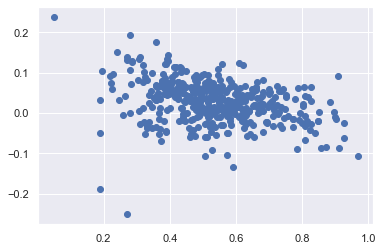

In [115]:
res=plt.scatter(y_pred_test,res)

plt.show()

Text(0.5, 0, 'Errors')

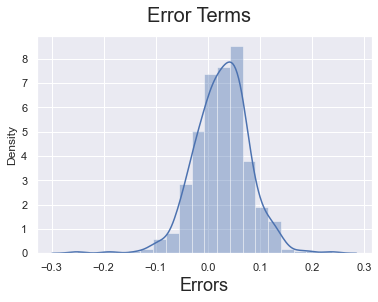

In [116]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

From the above figure the error terms are normally distributed.

In [117]:
# printing lasso optimised parameters and best mean test score
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.03405649051785769


In [118]:
# printing mean train and test scores along with rank
lasso_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_results[['param_alpha', 'rank_test_score', 'mean_train_score', 'mean_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,rank_test_score,mean_train_score,mean_test_score
0,0.0001,1,-0.032911,-0.034056
1,0.001,2,-0.035158,-0.035894
2,0.01,3,-0.071635,-0.071922
25,100,4,-0.105585,-0.105626
24,50,4,-0.105585,-0.105626
23,20,4,-0.105585,-0.105626
22,10.0,4,-0.105585,-0.105626
21,9.0,4,-0.105585,-0.105626
20,8.0,4,-0.105585,-0.105626
19,7.0,4,-0.105585,-0.105626


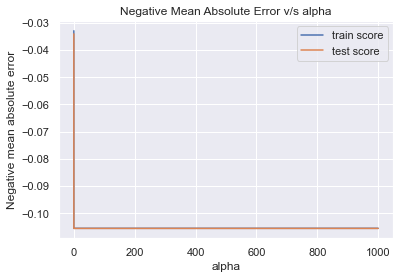

In [119]:
# Plotting test and train mean scores for different values of lambda/alpha
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float64')
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.title("Negative Mean Absolute Error v/s alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [120]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.933599,0.890851,0.889290
1,R2 Score (Test),0.827328,0.857822,0.835283
2,RSS (Train),1.231765,2.024742,2.053716
3,RSS (Test),1.589386,1.308696,1.516164
4,MSE (Train),0.035027,0.044907,0.045228
5,MSE (Test),0.060726,0.055104,0.059311


### Conclusion
- From the above Metric the Ridge Regression is showing better than Lasso Regression as R2 Score(Test) is higher,RSS and MSE is comparatively lower than Lasso.

- The R2 Score of Ridge is **0.89** in training set where as  nearly **0.86** in test set and the difference is not more than 4.

- What we need is lowest total error, i.e., low bias and low variance, such that the model identifies all the patterns and is also able to perform well with unseen data.

- So we conclude that our model is robust and generalisable.

## Lets observe the changes in the coefficients after regularization

In [121]:
betas = pd.DataFrame(index=X_train.columns)

In [122]:
betas.rows = X_train.columns

In [124]:
#Check the coefficients of Ridge and Lasso
betas['Lasso'] = lasso.coef_
betas['Ridge'] = ridge.coef_

In [125]:
pd.set_option('display.max_rows', None)
betas.head(10)

,Lasso,Ridge
LotArea,0.047116,0.053062
BsmtFinSF1,0.078848,0.079018
TotalBsmtSF,0.149017,0.150671
1stFlrSF,0.000000,0.093978
2ndFlrSF,0.023886,0.084364
GrLivArea,0.244523,0.141320
GarageArea,0.109197,0.110813
overallQual,0.280401,0.260872
overallCond,0.101711,0.101948
kitchenQual,0.079263,0.083593


**The coefficients of above variables are significant for prediticting SalePrice of House.**

In [126]:
# Checking coefficient for each predictor varaible
ridge_housing_df = pd.DataFrame({'Predictors':X_train.columns, 'Beta-Coefficients':np.array(ridge.coef_.round(3)).flatten()})
ridge_housing_df = ridge_housing_df.sort_values(by=['Beta-Coefficients'], ascending=False)
ridge_housing_df.reset_index(drop=True, inplace=True)
ridge_housing_df.head(10)

,Predictors,Beta-Coefficients
0,overallQual,0.261
1,TotalBsmtSF,0.151
2,GrLivArea,0.141
3,GarageArea,0.111
4,MSZoning_FV,0.103
5,overallCond,0.102
6,1stFlrSF,0.094
7,MSZoning_RL,0.085
8,2ndFlrSF,0.084
9,kitchenQual,0.084


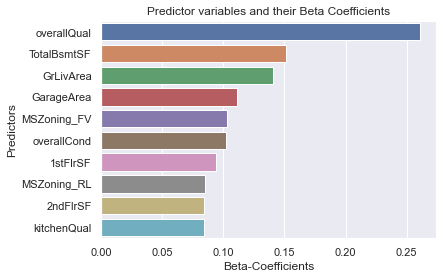

In [3156]:
# plotting Predictor variables and their Beta Coefficients
sns.barplot(y = 'Predictors', x='Beta-Coefficients', data = ridge_housing_df.head(10))
plt.title('Predictor variables and their Beta Coefficients')
plt.show()

#### Top 10 best predictor for Ridge are -
 - overallQual
 - TotalBsmtSF
 - GrLivArea
 - GarageArea
 - MSZoning_FV
 - overallCond
 - 1stFlrSF
 - MSZoning_RL
 - 2ndFlrSF
 - kitchenQual  